전처리 추가할 내용

- 연비 0인 값: 평균치로 바꾼다

- 1000cc 밑의 데이터를 전부 1000으로 조정

- 자동차 seats가 1개인 값은 삭제

- location, brand: 빈도수로 상위 5,6을 뽑고 나머지는 others로

- price, power: log를 씌웠을 때 이상치가 나타나면 제거

In [1]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [2]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
%matplotlib inline
from matplotlib import font_manager, rc
path = '/home/piai/바탕화면/01 실습파일/nanum-all/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC'

# 한글과 음수 표시
matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

In [22]:
df_raw = pd.read_csv("C:/Users/soyeo/OneDrive/Desktop/01 실습파일/2. Big Data 분석/Car.csv", encoding = "euc-kr")
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [23]:
# 단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['Mileage', 'Mileage_Unit']] = df_raw['Mileage'].str.split(expand = True)
df_raw[['Engine', 'Engine_Unit']] = df_raw['Engine'].str.split(expand = True)
df_raw[['Power', 'Power_Unit']] = df_raw['Power'].str.split(expand = True)
df_raw[['New_Price', 'New_Price_Unit']] = df_raw['New_Price'].str.split(expand = True)

In [24]:
df_raw['Mileage'] = df_raw['Mileage'].astype('float64')
df_raw['Engine'] = df_raw['Engine'].astype('float64')
df_raw['New_Price'] = df_raw['New_Price'].astype('float64')

In [25]:
# Replace non-numeric values with NaN
df_raw['Power'] = pd.to_numeric(df_raw['Power'], errors='coerce')

In [26]:
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['Mileage_Unit', 'Engine_Unit', 'Power_Unit', 'New_Price_Unit'], axis = 1)

In [27]:
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN


In [28]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
dtype: int64

## Mileage(연비) 0인 값: 평균치로 바꾼다

In [29]:
# Mileage 열의 평균값 계산 (0을 제외한 값으로)
mean_mileage = df_raw[df_raw['Mileage'] != 0]['Mileage'].mean()

# Mileage 열의 0인 값을 평균값으로 대체
df_raw['Mileage'] = df_raw['Mileage'].replace(0, mean_mileage)

print("데이터프레임 (Mileage 0값 평균으로 대체 후):")
df_raw

데이터프레임 (Mileage 0값 평균으로 대체 후):


,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


## Engine(배기량) 1000cc 밑의 데이터를 전부 1000으로 조정

In [30]:
# Engine 열에서 1000cc 미만인 값들을 1000으로 조정
df_raw['Engine'] = df_raw['Engine'].apply(lambda x: 1000 if x < 1000 else x)

print("데이터프레임 (Engine 1000cc 미만 값을 1000으로 조정 후):")
df_raw

데이터프레임 (Engine 1000cc 미만 값을 1000으로 조정 후):


,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


## 자동차 seats가 1개인 값은 삭제

In [31]:
# 'Seats'가 1인 행을 삭제
df_raw = df_raw[df_raw['Seats'] != 1]

print("데이터프레임 (Seats가 1인 값 삭제 후):")
df_raw

데이터프레임 (Seats가 1인 값 삭제 후):


,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


## location, brand: 빈도수로 상위 5,6을 뽑고 나머지는 others로

In [32]:
# Location 열에서 빈도수 계산
location_counts = df_raw['Location'].value_counts()

# 상위 5개 항목 추출
top_5_locations = location_counts.head(5).index

# Location 열에서 나머지 항목을 'Others'로 그룹화
df_raw['Location'] = df_raw['Location'].apply(lambda x: x if x in top_5_locations else 'Others')

In [33]:
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan Micra Diesel XV,Others,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


In [35]:
# 'Name' 열에서 가장 앞의 값을 추출하여 새로운 열 'Brand' 생성
df_raw['Brand'] = df_raw['Name'].str.split(' ', n=1).str[0]

In [36]:
# 결과 확인
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Honda Jazz V,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Maruti Ertiga VDI,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Audi


In [37]:
df_raw = df_raw.drop(['Name'], axis = 1)

In [38]:
# Brand 열에서 빈도수 계산
brand_counts = df_raw['Brand'].value_counts()

# 상위 6개 항목 추출
top_6_brands = brand_counts.head(6).index

# Brand 열에서 나머지 항목을 'Others'로 그룹화
df_raw['Brand'] = df_raw['Brand'].apply(lambda x: x if x in top_6_brands else 'Others')

In [39]:
df_raw.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Others


## Kilometers_Driven에서 max 제거

<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


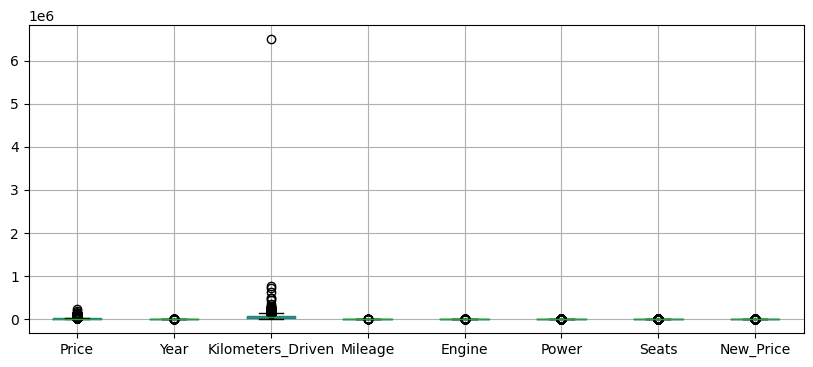

In [40]:
df_raw.boxplot(figsize = (10, 4))

In [41]:
max_value = df_raw['Kilometers_Driven'].max()

In [42]:
print(max_value)

6500000


In [43]:
max_index = df_raw['Kilometers_Driven'].idxmax()

In [44]:
print(max_index)

2328


In [45]:
max_row = df_raw.loc[max_index]

In [46]:
print(max_row)

Location                Others
Price                  99642.4
Year                      2017
Kilometers_Driven      6500000
Fuel_Type               Diesel
Transmission         Automatic
Owner_Type               First
Mileage                  15.97
Engine                  2993.0
Power                    258.0
Seats                      5.0
New_Price                  NaN
Brand                   Others
Name: 2328, dtype: object


In [47]:
df_raw = df_raw.drop(max_index)

In [48]:
len(df_raw)

7252

<AxesSubplot:>

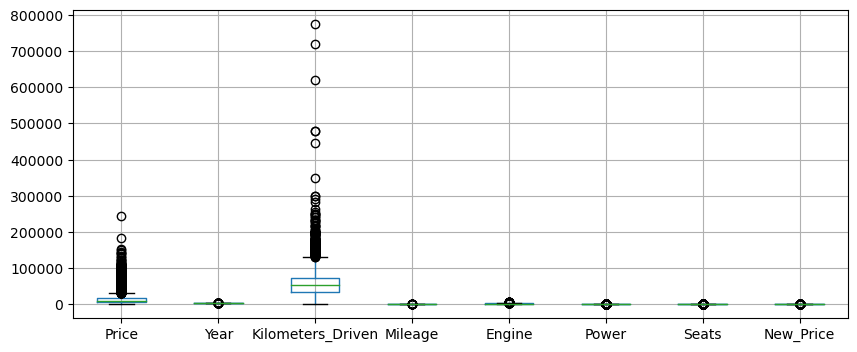

In [49]:
df_raw.boxplot(figsize = (10, 4))

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


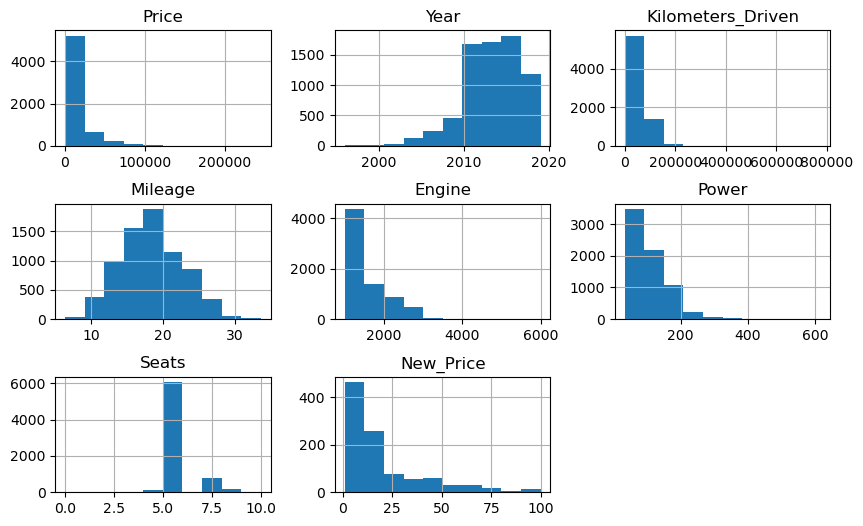

In [50]:
# Create histograms
ax = df_raw.hist(figsize=(10, 6))  # Increase figure height to give more room

# Adjust spacing between histograms
plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing between rows of subplots

# Show plot
plt.show()

In [51]:
df_raw.isnull().sum()

Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6246
Brand                   0
dtype: int64

In [52]:
df_raw['Mileage'].value_counts()

Mileage
17.00    208
18.90    201
18.60    144
21.10    107
20.36    105
        ... 
17.09      1
19.91      1
17.16      1
18.23      1
17.15      1
Name: count, Length: 438, dtype: int64

In [53]:
df_raw[df_raw['Mileage'].isna()]

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
4446,Others,19928.48,2016,50000,Electric,Automatic,First,NaN,1000.0,41.0,5.0,13.58,Others
4904,Mumbai,19545.24,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,Toyota


mileage에 대한 결측치를 채울 때 다른 변수와의 관계를 파악해서 제거하려고 했으나,

결측치가 2개 뿐이었으므로 pass, just 제거로 진행

In [56]:
# 결측치가 있는 행의 인덱스 추출
missing_indices = df_raw[df_raw['Mileage'].isna()].index

# 해당 인덱스를 사용하여 행 삭제
df_raw = df_raw.drop(missing_indices)

In [57]:
df_raw.isnull().sum()

Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
New_Price            6245
Brand                   0
dtype: int64

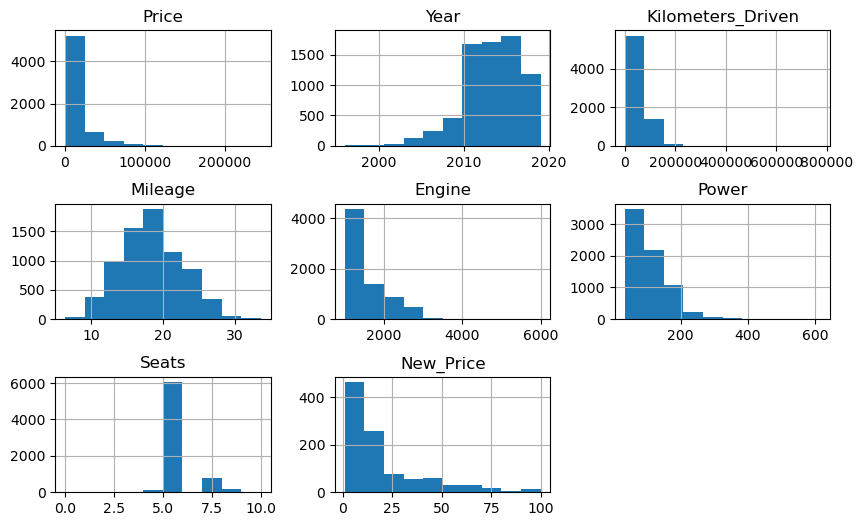

In [58]:
# Create histograms
ax = df_raw.hist(figsize=(10, 6))  # Increase figure height to give more room

# Adjust spacing between histograms
plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing between rows of subplots

# Show plot
plt.show()

In [59]:
df = df_raw.copy()

Price는 종속변수이기 데이터를 유사한 특성을 가진 최근접 이웃들의 평균 값으로 대체하려 하였으나, 다중회귀분석을 돌렸을 때 설명력이 10%정도로 나와서 중앙값으로 결측치를 처리하려 하였으나, Price에 대한 결측값을 모두 없애는 것이 데이터를 분포 그대로 유지하는 데 더 적합하다고 판단을 하여 1053개의 데이터를 제거하기로 함

Engine은 중앙값으로 결측치 처리

Power은 중앙값으로 결측치 처리

Seats은 중앙값으로 결측치 처리

New_Price는 데이터의 분포를 변수별로 확인해본다.(다중회귀 모델을 사용하여 모델 기반 대체를 사용한다.)

In [60]:
df.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Others


In [61]:
# Price 열의 결측치가 있는 행 제거
df_cleaned = df.dropna(subset=['Price'])

print("Price 열의 결측치가 제거된 데이터프레임:")
df_cleaned

Price 열의 결측치가 제거된 데이터프레임:


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06,Others
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79,Others
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16,Others
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57,Maruti


In [62]:
# 중앙값 계산
median_value = df_cleaned['Engine'].median()

# 결측치를 중앙값으로 대체
df_median1 = df_cleaned.copy()
df_median1['Engine'].fillna(median_value, inplace=True)

print("결측치를 중앙값으로 대체한 DataFrame:")
df_median1

결측치를 중앙값으로 대체한 DataFrame:


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06,Others
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79,Others
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16,Others
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57,Maruti


In [63]:
# 중앙값 계산
median_value = df_median1['Power'].median()

# 결측치를 중앙값으로 대체
df_median2 = df_median1.copy()
df_median2['Power'].fillna(median_value, inplace=True)

print("결측치를 중앙값으로 대체한 DataFrame:")
df_median2

결측치를 중앙값으로 대체한 DataFrame:


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06,Others
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79,Others
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16,Others
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57,Maruti


In [64]:
# 중앙값 계산
median_value = df_median2['Seats'].median()

# 결측치를 중앙값으로 대체
df_median3 = df_median2.copy()
df_median3['Seats'].fillna(median_value, inplace=True)

print("결측치를 중앙값으로 대체한 DataFrame:")
df_median3

결측치를 중앙값으로 대체한 DataFrame:


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06,Others
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79,Others
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16,Others
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57,Maruti


In [65]:
df_median3.isnull().sum()

Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5193
Brand                   0
dtype: int64

In [66]:
# New_Price 열에서 결측치가 아닌 부분만 추출
non_missing_new_price_df = df_median3[df_median3['New_Price'].notna()]

# 결과 출력
print("New_Price 열에서 결측치가 아닌 부분만 포함된 DataFrame:")
non_missing_new_price_df

New_Price 열에서 결측치가 아닌 부분만 포함된 DataFrame:


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
7,Mumbai,26826.80,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,Toyota
10,Kochi,15252.95,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,Maruti
15,Others,22994.40,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,32.01,Others
20,Kochi,28436.41,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,47.87,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06,Others
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79,Others
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16,Others
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57,Maruti


앞으로 New_Price 결측치 처리,

범주형 데이터 라벨 인코딩 처리,

로그 변환,

이상치 처리,

(price, power: log를 씌웠을 때 이상치가 나타나면 제거)

모델 생성

In [68]:
df_median3

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06,Others
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79,Others
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16,Others
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57,Maruti


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
# 범주형 변수 리스트
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']

# LabelEncoder 객체 생성
label_encoders = {}

# 각 범주형 변수에 대해 Label Encoding 수행 및 인코딩 매핑 출력
for column in categorical_columns:
    le = LabelEncoder()
    df_median3[column] = le.fit_transform(df_median3[column])
    label_encoders[column] = le
    # 매핑 결과 출력
    print(f"{column} 변환 매핑:")
    for class_label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_label} -> {encoded_value}")
    print()

# 결과 확인
print("변환된 데이터프레임:")
df_median3

Fuel_Type 변환 매핑:
  CNG -> 0
  Diesel -> 1
  LPG -> 2
  Petrol -> 3

Transmission 변환 매핑:
  Automatic -> 0
  Manual -> 1

Owner_Type 변환 매핑:
  First -> 0
  Fourth & Above -> 1
  Second -> 2
  Third -> 3

변환된 데이터프레임:


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Mumbai,2682.68,2010,72000,0,1,0,26.60,1000.0,58.16,5.0,NaN,Maruti
1,Pune,19162.00,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,NaN,Hyundai
2,Others,6898.32,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,8.61,Honda
3,Others,9197.76,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,NaN,Maruti
4,Coimbatore,27194.71,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,1,1,0,27.28,1047.0,69.00,5.0,7.06,Others
7231,Kochi,13474.72,2017,39015,3,1,0,17.00,1497.0,121.36,5.0,8.79,Others
7232,Mumbai,27838.55,2018,6000,3,1,0,16.00,1368.0,160.00,5.0,18.16,Others
7235,Kochi,16203.39,2017,21380,1,1,0,24.30,1248.0,88.50,5.0,10.57,Maruti


In [71]:
df_median3.isnull().sum()

Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5193
Brand                   0
dtype: int64

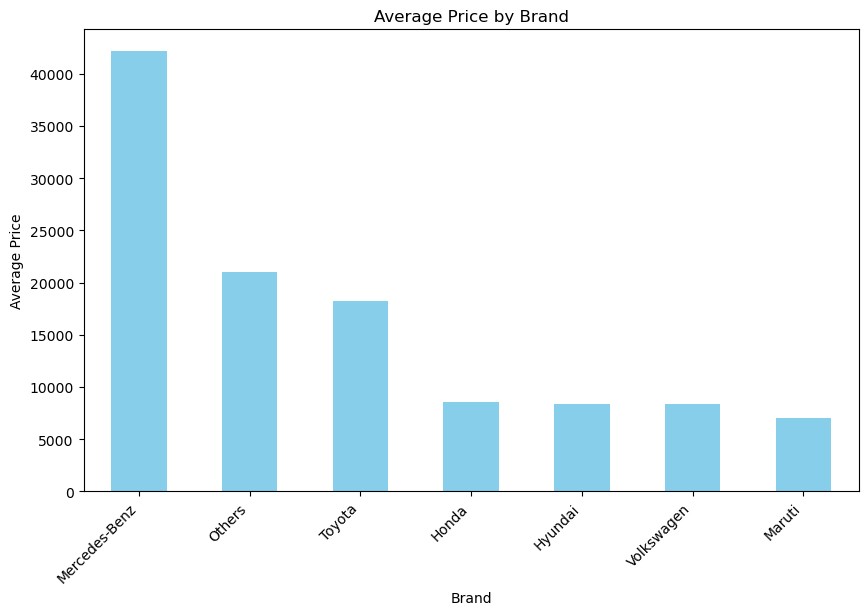

In [74]:
# 그룹별로 평균 신차 가격을 계산
brand_new_price = df_median3.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
brand_new_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

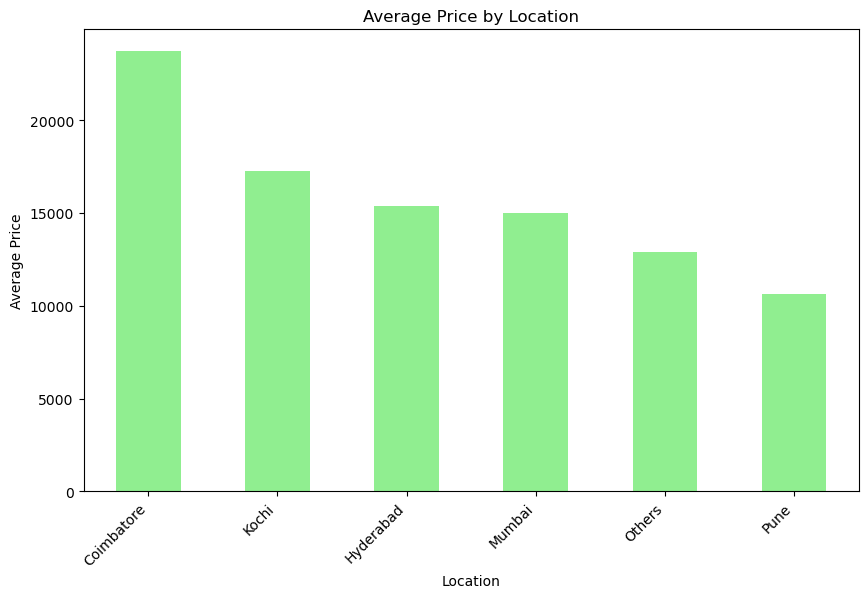

In [75]:
# 그룹별로 평균 신차 가격을 계산 (도시별)
location_new_price = df_median3.groupby('Location')['Price'].mean().sort_values(ascending=False)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
location_new_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [76]:
# 범주형 변수 리스트
categorical_columns = ['Brand', 'Location']

# LabelEncoder 객체 생성
label_encoders = {}

# 각 범주형 변수에 대해 Label Encoding 수행 및 인코딩 매핑 출력
for column in categorical_columns:
    le = LabelEncoder()
    df_median3[column] = le.fit_transform(df_median3[column])
    label_encoders[column] = le
    # 매핑 결과 출력
    print(f"{column} 변환 매핑:")
    for class_label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_label} -> {encoded_value}")
    print()

# 결과 확인
print("변환된 데이터프레임:")
df_median3

Brand 변환 매핑:
  Honda -> 0
  Hyundai -> 1
  Maruti -> 2
  Mercedes-Benz -> 3
  Others -> 4
  Toyota -> 5
  Volkswagen -> 6

Location 변환 매핑:
  Coimbatore -> 0
  Hyderabad -> 1
  Kochi -> 2
  Mumbai -> 3
  Others -> 4
  Pune -> 5

변환된 데이터프레임:


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,3,2682.68,2010,72000,0,1,0,26.60,1000.0,58.16,5.0,NaN,2
1,5,19162.00,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,NaN,1
2,4,6898.32,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,8.61,0
3,4,9197.76,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,NaN,2
4,0,27194.71,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,5,10822.70,2016,41413,1,1,0,27.28,1047.0,69.00,5.0,7.06,4
7231,2,13474.72,2017,39015,3,1,0,17.00,1497.0,121.36,5.0,8.79,4
7232,3,27838.55,2018,6000,3,1,0,16.00,1368.0,160.00,5.0,18.16,4
7235,2,16203.39,2017,21380,1,1,0,24.30,1248.0,88.50,5.0,10.57,2


In [77]:
df_median3.isnull().sum()

Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5193
Brand                   0
dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [87]:
data = df_median3.copy()

In [88]:
data.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Brand'],
      dtype='object')

In [89]:
# 결측치가 있는 New_Price 데이터 분리
new_price_missing = data[data['New_Price'].isnull()]
new_price_known = data.dropna(subset=['New_Price'])

# 특성과 타겟 분리
X_known = new_price_known[['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand']]
y_known = new_price_known['New_Price']

X_missing = new_price_missing[['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand']]

# 선형 회귀 모델 훈련
linear_model = LinearRegression()
linear_model.fit(X_known, y_known)

# 결측치 예측
new_price_missing_imputed_linear = linear_model.predict(X_missing)

In [83]:
# 결측치 채우기
data.loc[data['New_Price'].isnull(), 'New_Price'] = new_price_missing_imputed_linear

print("선형 회귀 예측 후 데이터:")
print(data)

선형 회귀 예측 후 데이터:
      Location     Price  Year  Kilometers_Driven  Fuel_Type  Transmission   
0            3   2682.68  2010              72000          0             1  \
1            5  19162.00  2015              41000          1             1   
2            4   6898.32  2011              46000          3             1   
3            4   9197.76  2012              87000          1             1   
4            0  27194.71  2013              40670          1             0   
...        ...       ...   ...                ...        ...           ...   
7228         5  10822.70  2016              41413          1             1   
7231         2  13474.72  2017              39015          3             1   
7232         3  27838.55  2018               6000          3             1   
7235         2  16203.39  2017              21380          1             1   
7236         2      7.08  2018              23955          3             1   

      Owner_Type  Mileage  Engine   Power  Seat

In [90]:
data1 = df_median3.copy()

In [91]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_known, y_known)

# 결측치 예측
new_price_missing_imputed_rf = rf_model.predict(X_missing)

# 결측치 채우기
data1.loc[data1['New_Price'].isnull(), 'New_Price'] = new_price_missing_imputed_rf

print("랜덤 포레스트 회귀 예측 후 데이터:")
print(data1)

랜덤 포레스트 회귀 예측 후 데이터:
      Location     Price  Year  Kilometers_Driven  Fuel_Type  Transmission   
0            3   2682.68  2010              72000          0             1  \
1            5  19162.00  2015              41000          1             1   
2            4   6898.32  2011              46000          3             1   
3            4   9197.76  2012              87000          1             1   
4            0  27194.71  2013              40670          1             0   
...        ...       ...   ...                ...        ...           ...   
7228         5  10822.70  2016              41413          1             1   
7231         2  13474.72  2017              39015          3             1   
7232         3  27838.55  2018               6000          3             1   
7235         2  16203.39  2017              21380          1             1   
7236         2      7.08  2018              23955          3             1   

      Owner_Type  Mileage  Engine   Power 

In [92]:
data2 = df_median3.copy()

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

# 그라디언트 부스팅 회귀 모델 훈련
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_model.fit(X_known, y_known)

# 결측치 예측
new_price_missing_imputed_gb = gb_model.predict(X_missing)

# 결측치 채우기
data2.loc[data2['New_Price'].isnull(), 'New_Price'] = new_price_missing_imputed_gb

print("그라디언트 부스팅 회귀 예측 후 데이터:")
print(data2)

그라디언트 부스팅 회귀 예측 후 데이터:
      Location     Price  Year  Kilometers_Driven  Fuel_Type  Transmission   
0            3   2682.68  2010              72000          0             1  \
1            5  19162.00  2015              41000          1             1   
2            4   6898.32  2011              46000          3             1   
3            4   9197.76  2012              87000          1             1   
4            0  27194.71  2013              40670          1             0   
...        ...       ...   ...                ...        ...           ...   
7228         5  10822.70  2016              41413          1             1   
7231         2  13474.72  2017              39015          3             1   
7232         3  27838.55  2018               6000          3             1   
7235         2  16203.39  2017              21380          1             1   
7236         2      7.08  2018              23955          3             1   

      Owner_Type  Mileage  Engine   Powe

In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 실제 New_Price 값을 가지고 있는 데이터로 예측 성능 평가
y_test = y_known
X_test = X_known

# 모델별 예측 및 RMSE 계산
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"선형 회귀 RMSE: {rmse_linear}")
print(f"랜덤 포레스트 회귀 RMSE: {rmse_rf}")
print(f"그라디언트 부스팅 회귀 RMSE: {rmse_gb}")

선형 회귀 RMSE: 11.7786506436539
랜덤 포레스트 회귀 RMSE: 3.1513022453856903
그라디언트 부스팅 회귀 RMSE: 2.839243461681227


모델 성능: gradient boosting 회귀 모델이 가장 낮은 rmse를 기록했으므로, 이 모델이 New_Price의 결측치를 예측하는 데 가장 우수한 성능을 보였음. 랜덤포레스트 회귀 모델도 비교적 높은 성능을 보였으며, 선형 회귀 모델은 상대적으로 낮은 성능을 보였음

모델 선택: 결측치를 예측하는 데 있어 가장 높은 정확도를 원한다면, gradient boosting 회귀 모델을 사용하는 것이 좋음. 랜덤 포레스트도 좋은 선택이지만 gradient boosting이 더 우수함

In [122]:
data2.isnull().sum()

Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Brand                0
dtype: int64

# 새로운 변수 생성

1. 차량 연령 (Car Age)

설명: 차량의 연식(Year)을 바탕으로 차량의 나이를 계산합니다.\
    
변수명: Car_Age
    
2. 주행거리 비율 (Kilometers_Per_Year)

설명: 차량의 총 주행 거리(Kilometers_Driven)를 차량의 나이(Car_Age)로 나눈 값입니다. 차량 연식에 따른 연평균 주행 거리를 추정할 수 있습니다.

변수명: Kilometers_Per_Year
    
3. 연료 효율성 (Fuel_Efficiency)

설명: 연료 종류(Fuel_Type)와 주행 거리(Mileage)를 조합하여 연료 효율성을 평가합니다. 연료 종류는 보통 Petrol, Diesel, CNG 등의 값을 가집니다. 이 변수를 Mileage로 대체하거나 가중치를 줄 수 있습니다.

변수명: Fuel_Efficiency
    
4. 엔진 출력 비율 (Engine_Power_Ratio)

설명: 엔진 용량(Engine)과 엔진 출력(Power)을 조합하여 엔진 출력 비율을 계산합니다. 이 비율은 차량의 성능을 나타낼 수 있습니다.

변수명: Engine_Power_Ratio

5. 가격 비율 (Price_to_New_Price_Ratio)

설명: 중고차 가격(Price)과 신차 가격(New_Price)의 비율입니다. 이는 차량의 가치 감가를 추정하는 데 유용할 수 있습니다.

변수명: Price_to_New_Price_Ratio

In [123]:
data3 = data2.copy()

In [124]:
data3.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Brand'],
      dtype='object')

In [125]:
# 차량 연령 계산
current_year = pd.Timestamp.now().year
data3['Car_Age'] = current_year - data3['Year']

# 주행거리 비율 계산
data3['Kilometers_Per_Year'] = data3['Kilometers_Driven'] / data3['Car_Age']

# 연료 효율성 매핑 정의 (레이블 인코딩된 값에 대응)
fuel_efficiency_mapping = {
    0: 1.5,  # CNG
    1: 1.2,  # Diesel
    2: 1.3,  # LPG
    3: 1.0   # Petrol
}

# Fuel_Type에 따른 연료 효율성을 계산하고, Mileage와 곱하여 새로운 변수 생성
data3['Fuel_Efficiency'] = data3['Fuel_Type'].map(fuel_efficiency_mapping) * data3['Mileage']

# 결측치가 남아있는지 확인
print(data3['Fuel_Efficiency'].isnull().sum())

# 엔진 출력 비율 계산
data3['Engine_Power_Ratio'] = data3['Power'] / data3['Engine']

# 가격 비율 계산
data3['Price_to_New_Price_Ratio'] = data3['Price'] / data3['New_Price']

0


In [126]:
data3.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Car_Age,Kilometers_Per_Year,Fuel_Efficiency,Engine_Power_Ratio,Price_to_New_Price_Ratio
0,3,2682.68,2010,72000,0,1,0,26.60,1000.0,58.16,5.0,5.455173,2,14,5142.857143,39.900,0.058160,491.768062
1,5,19162.00,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,17.863906,1,9,4555.555556,23.604,0.079772,1072.665771
2,4,6898.32,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,8.610000,0,13,3538.461538,18.200,0.073978,801.198606
3,4,9197.76,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,10.395767,2,12,7250.000000,24.924,0.071122,884.760073
4,0,27194.71,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,28.257203,4,11,3697.272727,18.240,0.071545,962.399220


In [128]:
data3.isnull().sum()

Location                    0
Price                       0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_Price                   0
Brand                       0
Car_Age                     0
Kilometers_Per_Year         0
Fuel_Efficiency             0
Engine_Power_Ratio          0
Price_to_New_Price_Ratio    0
dtype: int64

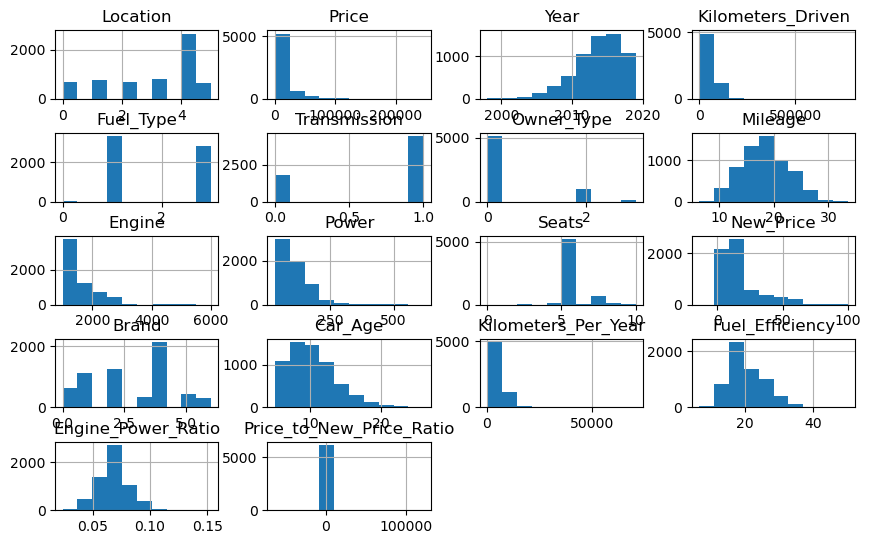

In [129]:
# Create histograms
ax = data3.hist(figsize=(10, 6))  # Increase figure height to give more room

# Adjust spacing between histograms and overall layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5)  # Increase vertical spacing

# Show plot
plt.show()

# 로그 변환

In [137]:
data4 = data3.copy()

In [138]:
data4.isnull().sum()

Location                    0
Price                       0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_Price                   0
Brand                       0
Car_Age                     0
Kilometers_Per_Year         0
Fuel_Efficiency             0
Engine_Power_Ratio          0
Price_to_New_Price_Ratio    0
dtype: int64

In [139]:
# 로그 변환을 적용할 변수들
variables_to_transform = ['Price', 'Kilometers_Driven', 'Engine', 'Power', 'Kilometers_Per_Year']

# 로그 변환 적용
for variable in variables_to_transform:
    data4[variable] = np.log1p(data4[variable])  # np.log1p(x)는 log(1 + x)를 계산

# 확인
data4

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Car_Age,Kilometers_Per_Year,Fuel_Efficiency,Engine_Power_Ratio,Price_to_New_Price_Ratio
0,3,7.894944,2010,11.184435,0,1,0,26.60,6.908755,4.080246,5.0,5.455173,2,14,8.545558,39.900,0.058160,491.768062
1,5,9.860737,2015,10.621352,1,1,0,19.67,7.367077,4.845761,5.0,17.863906,1,9,8.424322,23.604,0.079772,1072.665771
2,4,8.839178,2011,10.736418,3,1,0,18.20,7.090077,4.496471,5.0,8.610000,0,13,8.171730,18.200,0.073978,801.198606
3,4,9.126824,2012,11.373675,1,1,0,20.77,7.130099,4.497139,7.0,10.395767,2,12,8.888895,24.924,0.071122,884.760073
4,0,10.210815,2013,10.613271,1,0,2,15.20,7.585281,4.954418,5.0,28.257203,4,11,8.215621,18.240,0.071545,962.399220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,5,9.289493,2016,10.631374,1,1,0,27.28,6.954639,4.248495,5.0,7.060000,4,8,8.552102,32.736,0.065903,1532.960340
7231,2,9.508645,2017,10.571727,3,1,0,17.00,7.311886,4.806968,5.0,8.790000,4,7,8.625971,17.000,0.081069,1532.960182
7232,3,10.234213,2018,8.699681,3,1,0,16.00,7.221836,5.081404,5.0,18.160000,4,6,6.908755,16.000,0.116959,1532.959802
7235,2,9.693037,2017,9.970258,1,1,0,24.30,7.130099,4.494239,5.0,10.570000,2,7,8.024628,29.160,0.070913,1532.960265


New_Price의 경우에는 그래디언트 회귀로 예측한 값이기 때문에 로그 변환을 하지 않기로 한다.

In [148]:
data4.isnull().sum()

Location                    0
Price                       0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_Price                   0
Brand                       0
Car_Age                     0
Kilometers_Per_Year         0
Fuel_Efficiency             0
Engine_Power_Ratio          0
Price_to_New_Price_Ratio    0
dtype: int64

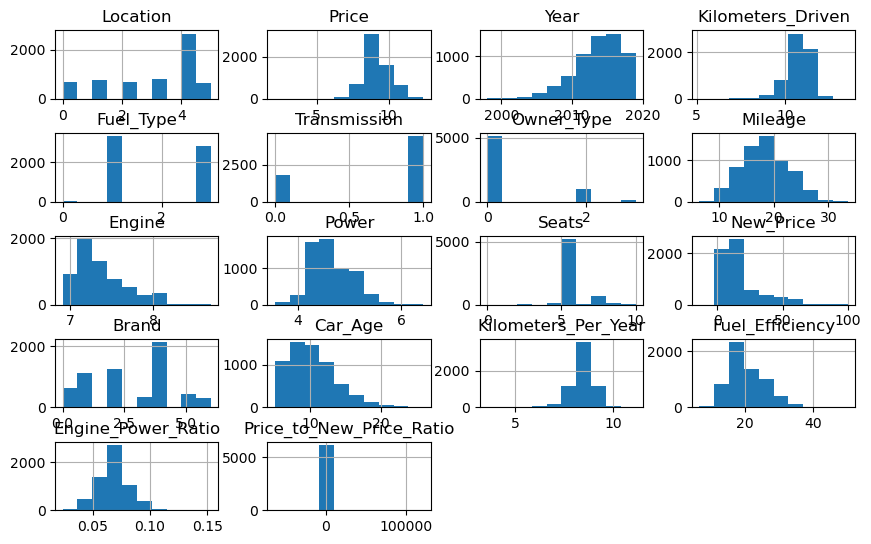

In [149]:
# Create histograms
ax = data4.hist(figsize=(10, 6))  # Increase figure height to give more room

# Adjust spacing between histograms and overall layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5)  # Increase vertical spacing

# Show plot
plt.show()

In [150]:
data4.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Brand', 'Car_Age', 'Kilometers_Per_Year',
       'Fuel_Efficiency', 'Engine_Power_Ratio', 'Price_to_New_Price_Ratio'],
      dtype='object')

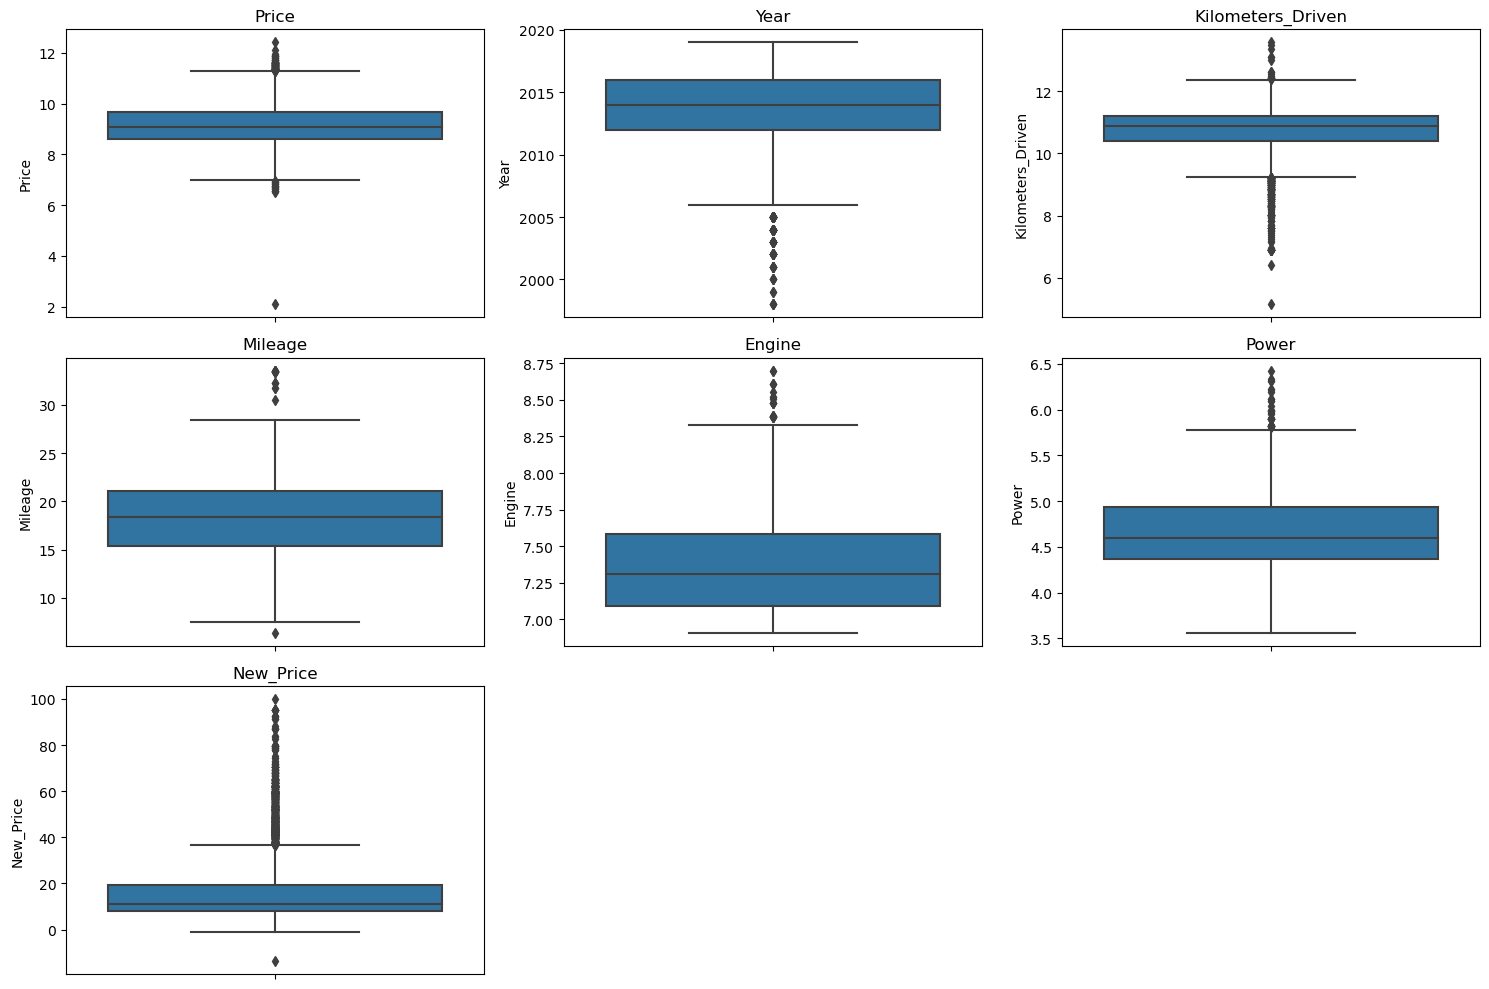

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
                    'New_Price']

# Create a sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your data here
# For the purpose of this example, let's assume df is already defined

# Initialize the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each continuous variable
for i, var in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars) // 3 + 1, 3, i + 1)
    sns.boxplot(data=data4, y=var)
    plt.title(var)

plt.tight_layout()
plt.show()

In [161]:
len(data4)

6197

In [168]:
data5 = data4.copy()

In [169]:
# 데이터프레임을 'Price'로 내림차순 정렬
df_sorted = data5.sort_values(by='Price', ascending=True)

# 하위 3개의 행 인덱스 선택
bottom_3_indices = df_sorted.head(3).index

# 하위 3개 행 제거
df_cleaned = data5.drop(index=bottom_3_indices)

print("DataFrame after removing bottom 3 lowest 'Price' entries:")
print(df_cleaned.head())

DataFrame after removing bottom 3 lowest 'Price' entries:
   Location      Price  Year  Kilometers_Driven  Fuel_Type  Transmission   
0         3   7.894944  2010          11.184435          0             1  \
1         5   9.860737  2015          10.621352          1             1   
2         4   8.839178  2011          10.736418          3             1   
3         4   9.126824  2012          11.373675          1             1   
4         0  10.210815  2013          10.613271          1             0   

   Owner_Type  Mileage    Engine     Power  Seats  New_Price  Brand  Car_Age   
0           0    26.60  6.908755  4.080246    5.0   5.455173      2       14  \
1           0    19.67  7.367077  4.845761    5.0  17.863906      1        9   
2           0    18.20  7.090077  4.496471    5.0   8.610000      0       13   
3           0    20.77  7.130099  4.497139    7.0  10.395767      2       12   
4           2    15.20  7.585281  4.954418    5.0  28.257203      4       11   

   K

In [170]:
df_cleaned.isnull().sum()

Location                    0
Price                       0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_Price                   0
Brand                       0
Car_Age                     0
Kilometers_Per_Year         0
Fuel_Efficiency             0
Engine_Power_Ratio          0
Price_to_New_Price_Ratio    0
dtype: int64

In [171]:
len(df_cleaned)

6194

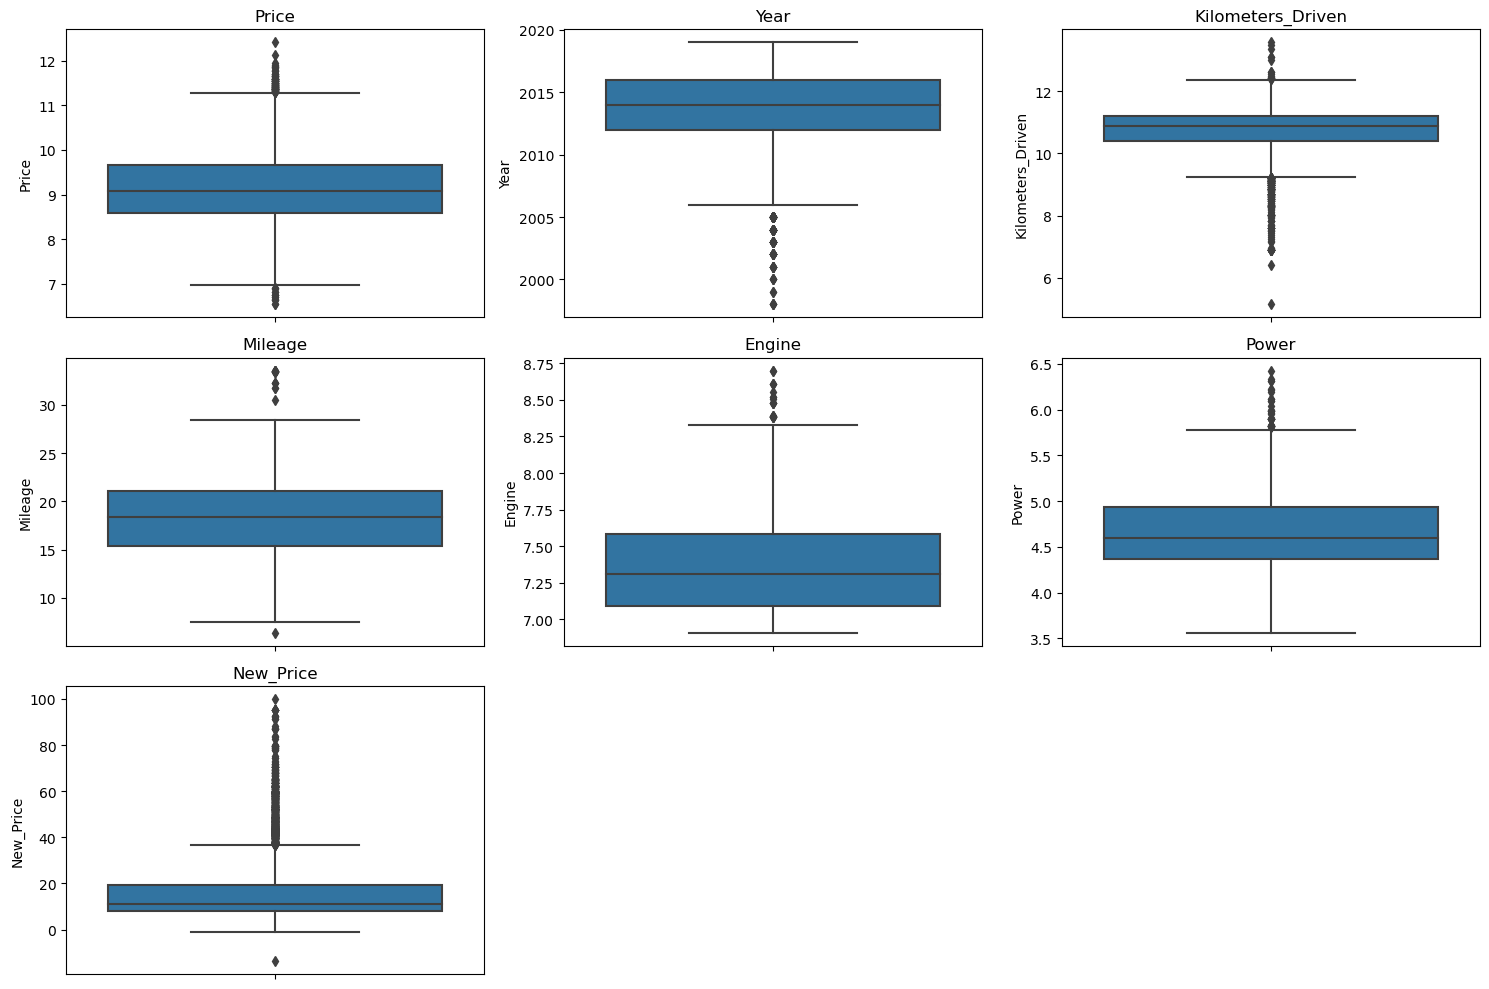

In [172]:
# List of continuous variables
continuous_vars = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
                    'New_Price']

# Create a sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your data here
# For the purpose of this example, let's assume df is already defined

# Initialize the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each continuous variable
for i, var in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df_cleaned, y=var)
    plt.title(var)

plt.tight_layout()
plt.show()

하위 3개를 지운 이유는 Price에서 이상치라고 생각하는 아래 값을 없애서 그래프를 보고 판단

In [173]:
df_cleaned.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Car_Age,Kilometers_Per_Year,Fuel_Efficiency,Engine_Power_Ratio,Price_to_New_Price_Ratio
0,3,7.894944,2010,11.184435,0,1,0,26.60,6.908755,4.080246,5.0,5.455173,2,14,8.545558,39.900,0.058160,491.768062
1,5,9.860737,2015,10.621352,1,1,0,19.67,7.367077,4.845761,5.0,17.863906,1,9,8.424322,23.604,0.079772,1072.665771
2,4,8.839178,2011,10.736418,3,1,0,18.20,7.090077,4.496471,5.0,8.610000,0,13,8.171730,18.200,0.073978,801.198606
3,4,9.126824,2012,11.373675,1,1,0,20.77,7.130099,4.497139,7.0,10.395767,2,12,8.888895,24.924,0.071122,884.760073
4,0,10.210815,2013,10.613271,1,0,2,15.20,7.585281,4.954418,5.0,28.257203,4,11,8.215621,18.240,0.071545,962.399220


# 스케일링 처리

In [176]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [180]:
df_cleaned

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Car_Age,Kilometers_Per_Year,Fuel_Efficiency,Engine_Power_Ratio,Price_to_New_Price_Ratio
0,3,7.894944,2010,11.184435,0,1,0,26.60,6.908755,4.080246,5.0,5.455173,2,14,8.545558,39.900,0.058160,491.768062
1,5,9.860737,2015,10.621352,1,1,0,19.67,7.367077,4.845761,5.0,17.863906,1,9,8.424322,23.604,0.079772,1072.665771
2,4,8.839178,2011,10.736418,3,1,0,18.20,7.090077,4.496471,5.0,8.610000,0,13,8.171730,18.200,0.073978,801.198606
3,4,9.126824,2012,11.373675,1,1,0,20.77,7.130099,4.497139,7.0,10.395767,2,12,8.888895,24.924,0.071122,884.760073
4,0,10.210815,2013,10.613271,1,0,2,15.20,7.585281,4.954418,5.0,28.257203,4,11,8.215621,18.240,0.071545,962.399220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,4,9.045262,2016,10.491302,3,1,0,19.83,7.089243,4.219508,5.0,5.530000,4,8,8.412055,19.830,0.055927,1532.960217
7228,5,9.289493,2016,10.631374,1,1,0,27.28,6.954639,4.248495,5.0,7.060000,4,8,8.552102,32.736,0.065903,1532.960340
7231,2,9.508645,2017,10.571727,3,1,0,17.00,7.311886,4.806968,5.0,8.790000,4,7,8.625971,17.000,0.081069,1532.960182
7232,3,10.234213,2018,8.699681,3,1,0,16.00,7.221836,5.081404,5.0,18.160000,4,6,6.908755,16.000,0.116959,1532.959802


In [181]:
# 표준화 (Standardization)
scaler_standard = StandardScaler()
# 표준화할 컬럼을 지정
cols_to_standardize = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
# 표준화 수행
df_standardized = df_cleaned.copy()
df_standardized[cols_to_standardize] = scaler_standard.fit_transform(df_cleaned[cols_to_standardize])

In [183]:
df_standardized.describe()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Car_Age,Kilometers_Per_Year,Fuel_Efficiency,Engine_Power_Ratio,Price_to_New_Price_Ratio
count,6194.000000,6.194000e+03,6.194000e+03,6.194000e+03,6194.000000,6194.000000,6194.000000,6.194000e+03,6.194000e+03,6.194000e+03,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000
mean,2.955764,6.168782e-16,-9.553439e-15,6.894352e-16,1.905231,0.712464,0.372942,9.521319e-17,1.207946e-15,-1.358222e-15,5.277204,17.305471,2.767194,10.565224,8.432128,20.515352,0.068346,1019.448233
std,1.548395,1.000081e+00,1.000081e+00,1.000081e+00,1.008551,0.452650,0.812516,1.000081e+00,1.000081e+00,1.000081e+00,0.805985,15.190531,1.691741,3.270075,0.613554,5.544977,0.013692,4132.496751
min,0.000000,-3.006820e+00,-4.720388e+00,-7.713220e+00,0.000000,0.000000,0.000000,-2.882680e+00,-1.360930e+00,-2.666684e+00,0.000000,-13.673425,0.000000,5.000000,3.561046,6.400000,0.023842,-63578.056251
25%,2.000000,-6.745337e-01,-4.387947e-01,-4.675360e-01,1.000000,0.000000,0.000000,-7.178245e-01,-7.937786e-01,-6.822253e-01,5.000000,7.945349,1.000000,8.000000,8.156983,16.716000,0.060320,547.685948
50%,4.000000,-1.098234e-01,1.728615e-01,1.733273e-01,1.000000,1.000000,0.000000,-9.068362e-03,-1.025657e-01,-1.369414e-01,5.000000,11.069721,3.000000,10.000000,8.517393,19.200000,0.067040,813.585359
75%,4.000000,5.569149e-01,7.845177e-01,6.140052e-01,3.000000,1.000000,0.000000,6.532506e-01,7.649297e-01,7.053261e-01,5.000000,19.442140,4.000000,12.000000,8.805025,24.000000,0.075674,1071.277371
max,5.000000,3.673993e+00,1.702002e+00,3.882972e+00,3.000000,1.000000,3.000000,3.645562e+00,4.265681e+00,4.363407e+00,10.000000,99.920000,6.000000,26.000000,11.162737,50.310000,0.153421,121422.000000


In [184]:
df_standardized.isnull().sum()

Location                    0
Price                       0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_Price                   0
Brand                       0
Car_Age                     0
Kilometers_Per_Year         0
Fuel_Efficiency             0
Engine_Power_Ratio          0
Price_to_New_Price_Ratio    0
dtype: int64

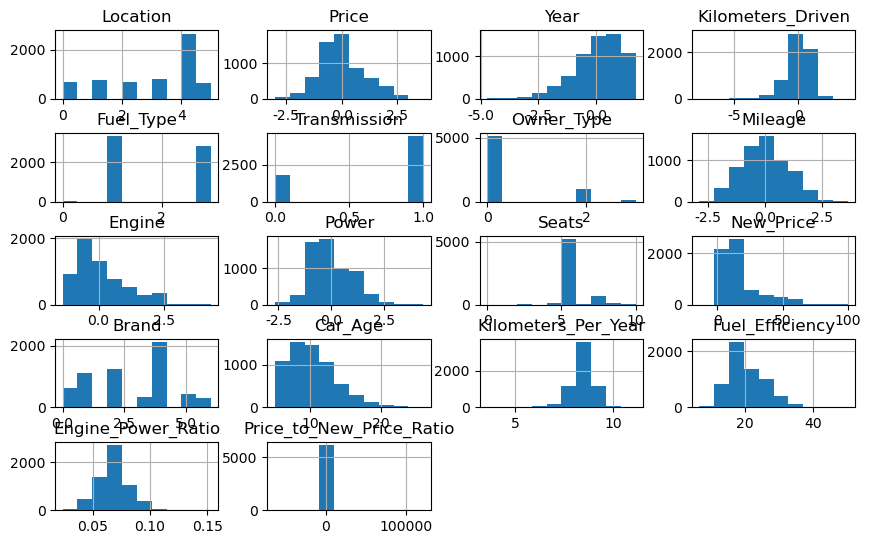

In [185]:
# Create histograms
ax = df_standardized.hist(figsize=(10, 6))  # Increase figure height to give more room

# Adjust spacing between histograms and overall layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5)  # Increase vertical spacing

# Show plot
plt.show()

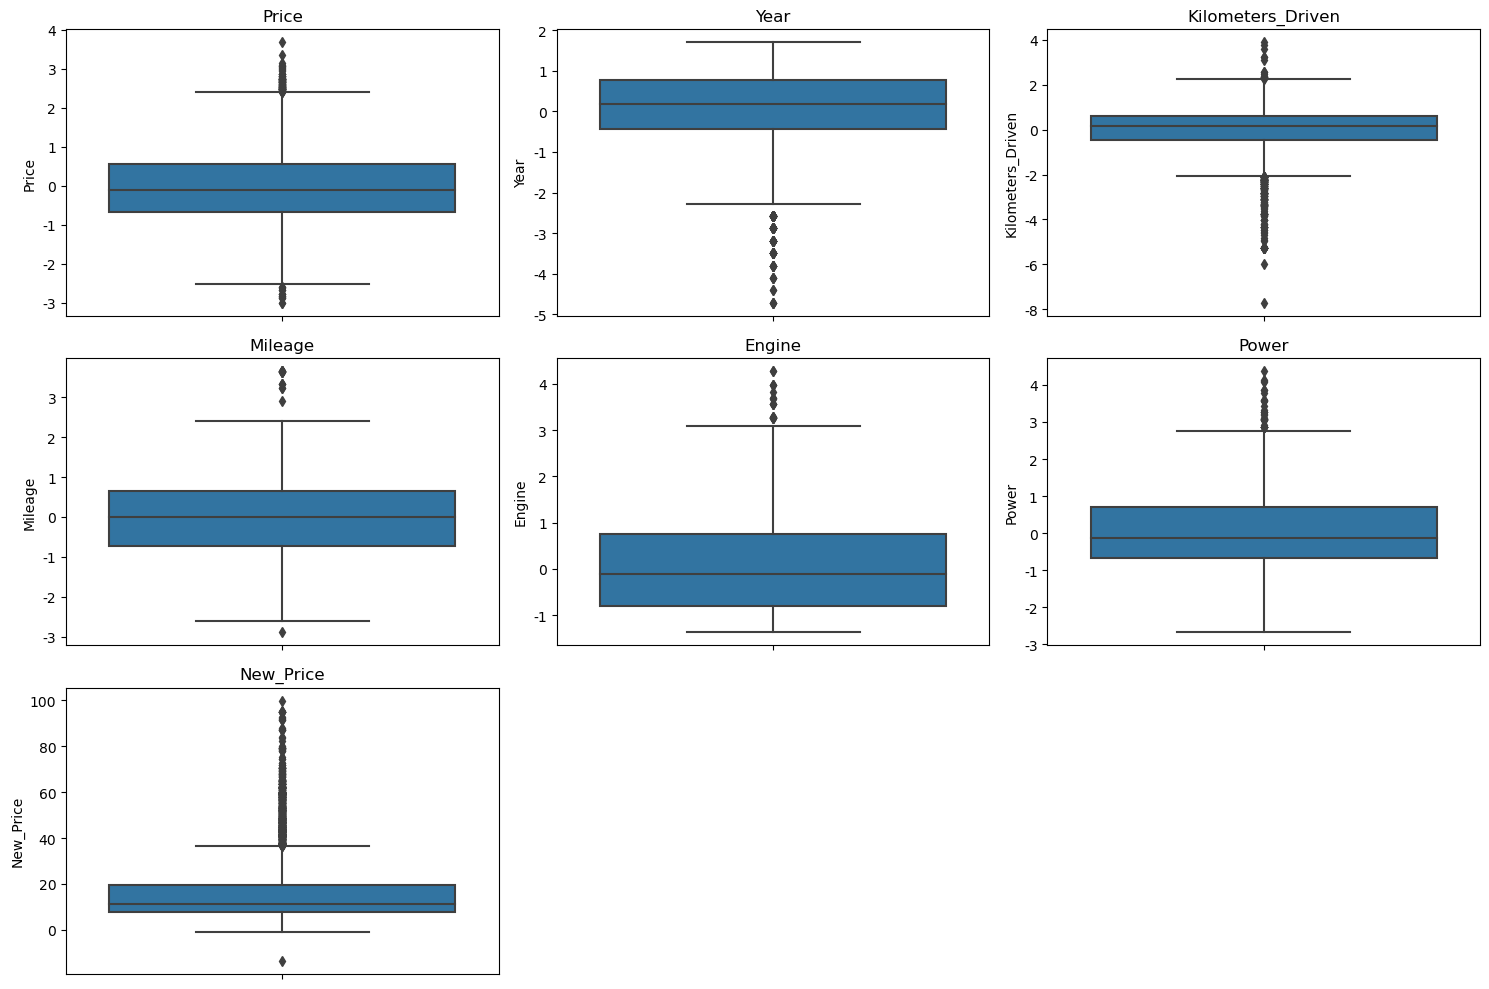

In [186]:
# List of continuous variables
continuous_vars = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
                    'New_Price']

# Create a sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your data here
# For the purpose of this example, let's assume df is already defined

# Initialize the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each continuous variable
for i, var in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df_standardized, y=var)
    plt.title(var)

plt.tight_layout()
plt.show()

In [187]:
df_standardized.to_csv("C:/Users/soyeo/OneDrive/Desktop/01 실습파일/2. Big Data 분석/Car_final.csv", encoding = "euc-kr", index = False)